In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Washburn inspired data

1. gamma: the tea surface tension, in N m−1
2. phi: the contact angle between the biscuit and the tea surface, in rad.
3. eta: the tea dynamic viscosity, in Pa s
4. L: the distance up the biscuit that the tea was visible, in m.
5. t: the time after initial dunking that the measurement was made, in s.
6. biscuit: the type of biscuit that was dunked, which is Rich Tea, Hobnob or Digestive.


L = sqrt(gamma . r . t .cos(phi)/2,eta)

In [3]:
# Load the data
big_df = pd.read_csv('dunking-data.csv')
big_df.head()

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob


In [4]:
big_df['biscuit'].value_counts()

biscuit
Digestive    1000
Hobnob       1000
Rich Tea     1000
Name: count, dtype: int64

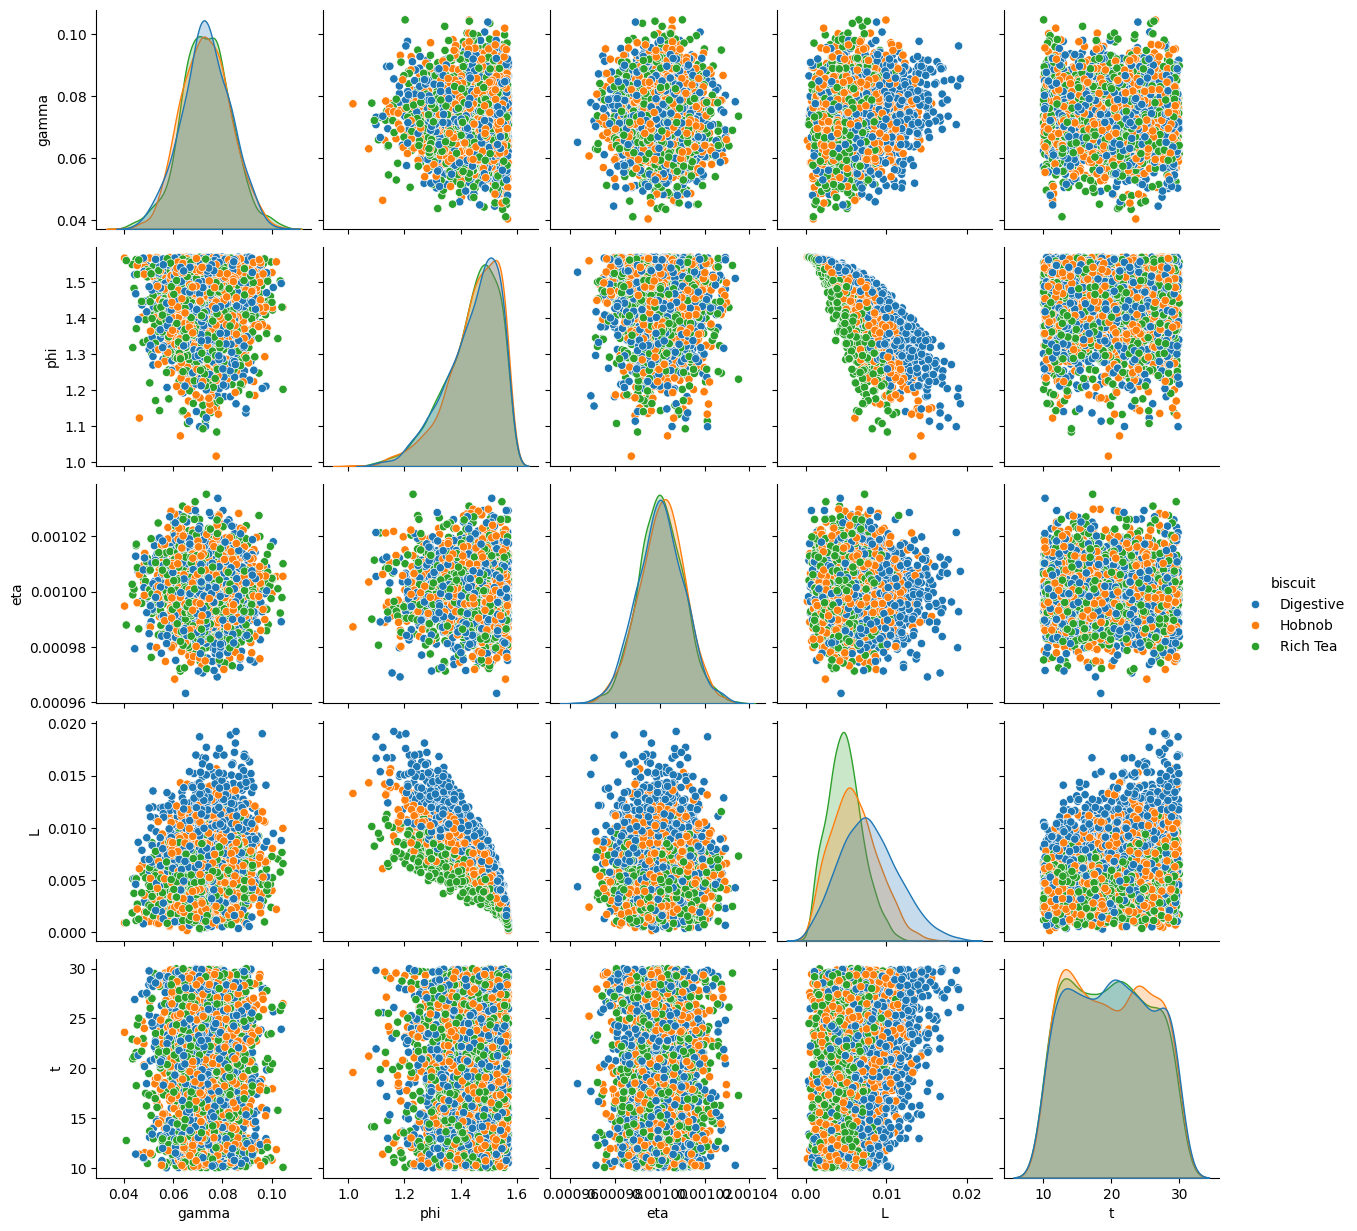

In [5]:
sns.pairplot(big_df, hue='biscuit')
plt.show()

In [6]:
big_df['L_squared'] = big_df['L']**2
big_df['cos(phi)'] = np.cos(big_df['phi'])
big_df['2eta'] = 2*big_df['eta']

In [7]:
micro_df = pd.read_csv('microscopy-data.csv')
micro_df.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [8]:
micro_df['L_squared'] = micro_df['L']**2
micro_df['cos(phi)'] = np.cos(micro_df['phi'])
micro_df['2eta'] = 2*micro_df['eta']

micro_df['washer_model'] = (micro_df['L_squared'] * micro_df['2eta'])/(micro_df['gamma']*micro_df['t']*micro_df['cos(phi)'])

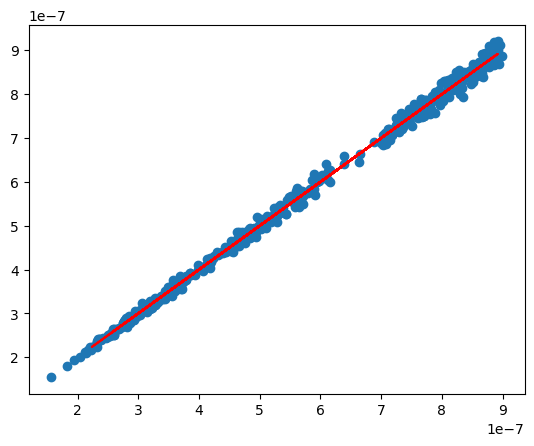

In [9]:
X = micro_df[['r']]
y = micro_df['washer_model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(micro_df['r'], micro_df['washer_model'])

plt.plot(X_test, y_pred, color='red')

plt.show()

In [10]:
print(f'y = x{model.coef_} + {model.intercept_}')
print(f'accuracy is {model.score(X_test, y_test)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}')

y = x[0.99864948] + 6.522851663584087e-10
accuracy is 0.9969256819159618
MAE: 8.912369797485757e-09, MSE: 1.428205952573918e-16, R2: 0.9969256819159618


In [11]:
# Splitting the data into features (X) and target (y)
X = micro_df[:, :-1]  # Features (gamma, r, t, phi, eta)
y = micro_df[:, -1]   # Target (observed distance L)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multilinear regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


InvalidIndexError: (slice(None, None, None), slice(None, -1, None))